In [1]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd
import librosa
import librosa.display

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/졸업작품/EnglishSpeechAccentAnalyzer

/content/drive/MyDrive/Colab Notebooks/졸업작품/EnglishSpeechAccentAnalyzer


In [5]:
#load the data 
df = pd.read_csv("speakers.csv", header=0)

# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 10) is the shape of the dataset
------------------------
    age  age_onset                       birthplace filename native_language  \
0  25.0       13.0  kabul, zoroastrian, afghanistan    dari1            dari   
1  55.0       12.0               kabul, afghanistan    dari2            dari   
2  20.0       12.0               kabul, afghanistan    dari3            dari   
3  59.0       13.0               kabul, afghanistan    dari4            dari   
4  56.0       32.0               kabul, afghanistan    dari5            dari   

      sex  speakerid      country  file_missing? continent  
0  female         56  afghanistan          False      asia  
1    male        642  afghanistan          False      asia  
2    male        968  afghanistan          False      asia  
3    male       1754  afghanistan          False      asia  
4  female       1868  afghanistan          False      asia  


In [7]:
print(df.columns)

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?', 'continent'],
      dtype='object')


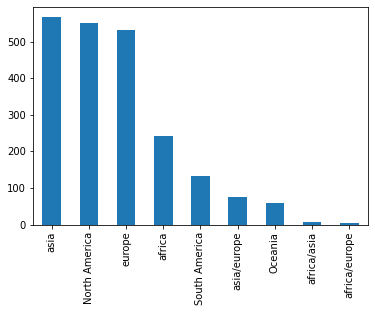

In [8]:
df['continent'].value_counts().plot(kind='bar')

In [9]:
df.groupby("continent")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
asia,566.0,32.270318,12.656499,18.0,23.0,28.0,39.00,81.0
North America,550.0,34.853636,17.133435,6.0,21.0,29.0,46.00,90.0
europe,533.0,32.023452,14.638498,18.0,21.0,26.0,38.00,97.0
africa,241.0,35.753112,11.745666,15.5,26.0,35.0,44.00,65.0
South America,133.0,32.639098,13.700994,17.0,22.0,29.0,39.00,80.0
asia/europe,75.0,28.920000,11.301471,18.0,23.0,25.0,31.00,68.0
Oceania,59.0,31.440678,11.109597,18.0,22.5,28.0,38.00,60.0
africa/asia,6.0,35.666667,14.935417,18.0,26.5,34.0,41.50,60.0
africa/europe,4.0,51.750000,12.175796,36.0,46.5,53.0,58.25,65.0


In [10]:
# file_missing
df.groupby("file_missing?")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
file_missing?,,,,,,,,
False,2140.0,33.080607,14.444245,0.0,22.0,28.0,41.0,97.0
True,32.0,35.562500,15.063173,18.0,24.0,35.0,42.0,73.0


In [11]:
import os

In [15]:
# Count the total audio files given
print (len([name for name in os.listdir('../archive/recordings/recordings') if os.path.isfile(os.path.join('../archive/recordings/recordings', name))]))

2138
